In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5


In [ ]:
f(3.0)

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs,ys)

In [ ]:
h=0.01
x=3.0
(f(x+h) - f(x))/h

In [ ]:
h=0.001
a=2.0
b=-3.0
c=10.0

d1= a*b + c
c+=h
d2= a*b + c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

In [78]:
class Value:    
    def __init__(self,data, _children=(),_op='', label=''):
        self.data = data
        self._prev=set (_children)
        self._op =_op
        self.label=label
        self.grad=0.0

    def __repr__(self):
        return f"Value=(data={self.data})"
    
    def __add__(self,other):
        out= Value(self.data + other.data,(self,other),'+')
        return out 
    
    def __mul__(self,other):
        out= Value(self.data * other.data,(self,other),'*')
        return out 

a=Value(2.0 ,label='a')
b=Value(-3.0,label='b')
c=Value(10,label='c')
e= a*b;e.label='e'
d=e+c ; d.label='d'
f= Value(-2.0,label='f')
L=d*f; L.label='L'
L

Value=(data=-8.0)

In [88]:
from graphviz import Digraph

def trace(root):
    """Builds a set of all nodes and edges in a graph"""
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root):
    """Draws a computational graph using Graphviz"""
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right
    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        # Create a rectangular ('record') node for the value
        dot.node(name=uid, label=" { %s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad), shape='record')

        # If this value is a result of some operation, create an op node for it
        if n._op: 
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # Connect n1 to the op node of n2 (if n2 has an operation)
        if n2._op:
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        else:
            dot.edge(str(id(n1)), str(id(n2)))

    return dot


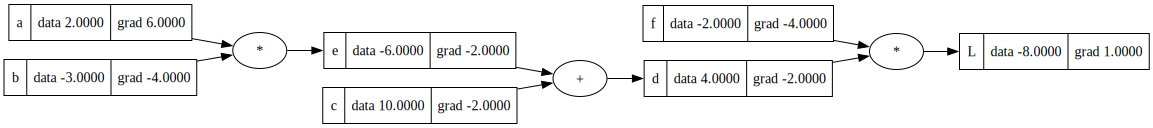

In [89]:
draw_dot(L)

In [86]:
a.grad=6.0000
b.grad=-4.0000
e.grad=-2.0000
c.grad=-2.0000
f.grad=-4.0000
d.grad=-2.0000
L.grad=1.0


In [83]:
def lol():
    h=0.001

    a=Value(2.0 ,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e= a*b;e.label='e'
    d=e+c ; d.label='d'
    f= Value(-2.0,label='f')
    L=d*f; L.label='L'
    L1=L.data

    
    a=Value(2.0 ,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e= a*b;e.label='e'
    d=e+c ; d.label='d'
    f= Value(-2.0  +h,label='f')
    L=d*f; L.label='L'
    L2=L.data

    print ((L2-L1)/h)


lol()

3.9999999999995595
